# Segment Data from the Calcbench API
## The data behind the [Calcbench Segments](https://www.calcbench.com/segments) page.

In [ ]:
# %#pip install calcbench-api-client[Pandas] pandasgui nltk

In [4]:
import calcbench as cb
from pandasgui import show
import pandas as pd
from nltk.metrics import edit_distance

In [5]:
tickers = cb.tickers(index="DJIA")

In [6]:
d = cb.dimensional(
    company_identifiers=tickers,
    metrics=["GeographicalSegmentRevenue"],
    period_type="annual",
)

In [34]:
# Drop rows for which we do not have a standardized_label
d = d.iloc[~d.index.get_level_values('standardized_label').isna()]

In [35]:
chart_values = d.loc[
    (["DIS", "WMT"], slice(None), slice(None), slice(None), slice(None)), :
]

In [36]:
edit_distances = (
    chart_values.reset_index()
    .apply(lambda r: edit_distance(r["label"], r["standardized_label"]), axis=1)
    .rename("edit_distance")
)

In [37]:
edit_distances.index = chart_values.index

In [38]:
x = (
    chart_values.merge(edit_distances, right_index=True, left_index=True)
    .sort_values("edit_distance")
    .droplevel(["metric", "label"], axis=0)
)

In [39]:
no_dupes = x.loc[~x.index.duplicated()].sort_index()

<Axes: xlabel='fiscal_period'>

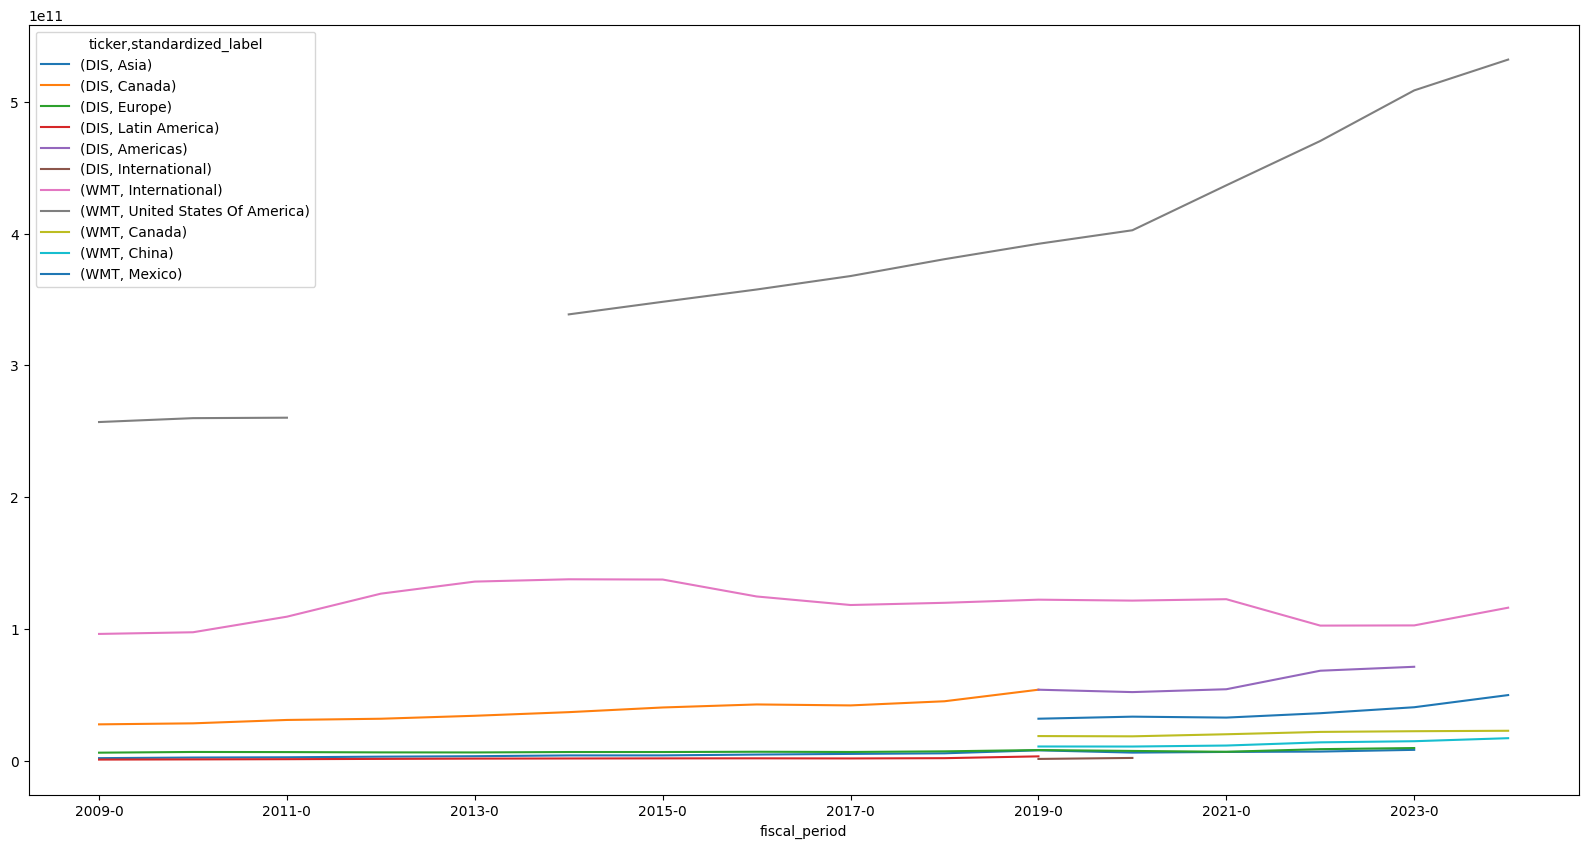

In [44]:
no_dupes.unstack([ "ticker", "standardized_label",])["value"].plot(figsize=(20, 10))